In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [3]:
X ,y=make_classification( n_informative=5 ,n_features=5 , n_redundant=0 ,n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()


(100, 6)


,col1,col2,col3,col4,col5,target
0,-2.984010,2.719925,-1.940581,-2.370197,0.712396,1
1,1.603724,-0.981028,-1.170072,0.966473,-0.589824,0
2,2.443493,-0.737301,2.560642,-0.803525,-2.914764,0
3,-1.138208,4.048551,-1.596340,-2.390808,-0.006740,1
4,-3.764499,2.719566,0.902420,0.469164,0.894356,1


In [5]:
bag = BaggingClassifier(max_features=2)


bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

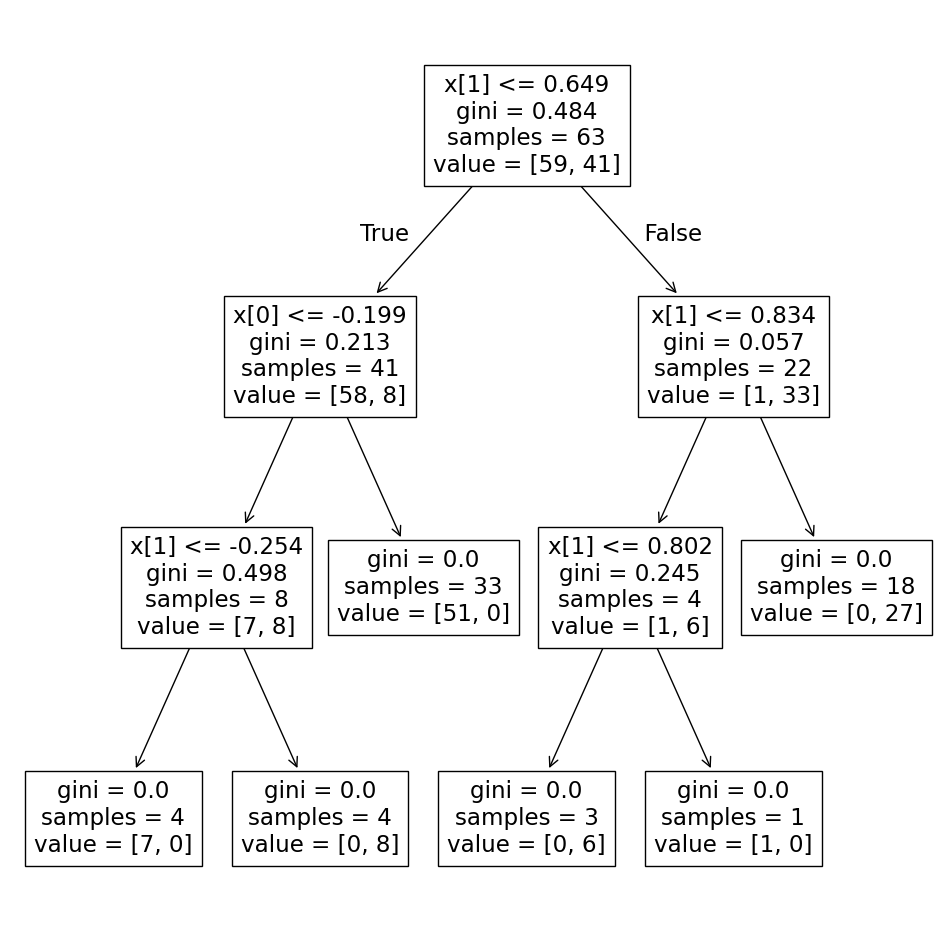

In [6]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()


In [7]:
rf = RandomForestClassifier(max_features=2)


rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

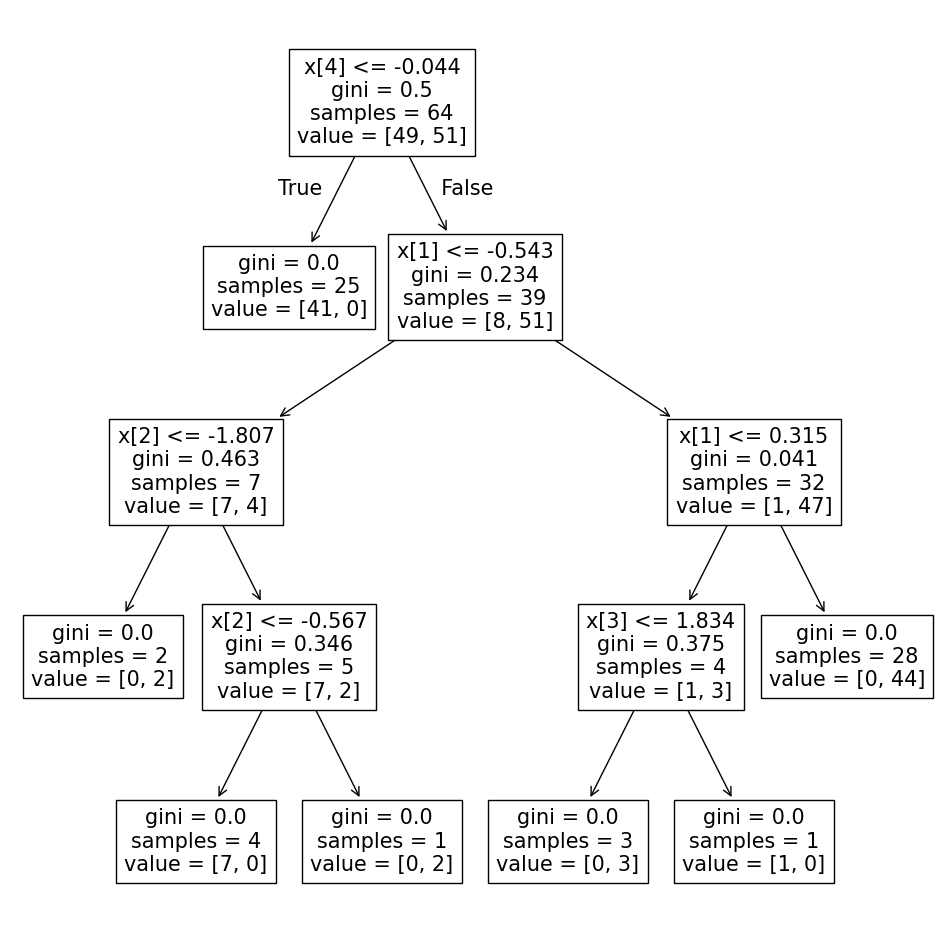

In [8]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

In [9]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [10]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(80, 5)
(20, 5)


In [21]:
f = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.95

In [12]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9

In [13]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.95

In [14]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.95

In [18]:
rf = RandomForestClassifier(max_samples=0.75,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.95

In [23]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),X,y,cv=10,scoring='accuracy'))

np.float64(0.99)

In [24]:
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

# 108 diff random forest train
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)


{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [25]:
rf = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [26]:
rf_grid.best_score_

np.float64(1.0)

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt



np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


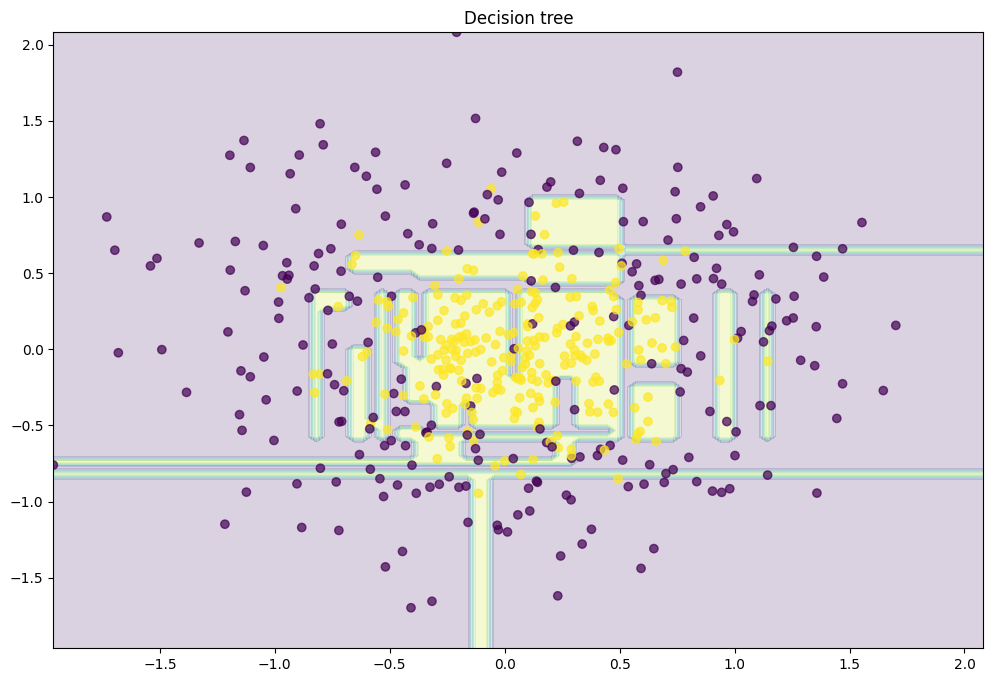

In [29]:
from sklearn.tree import DecisionTreeClassifier


dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

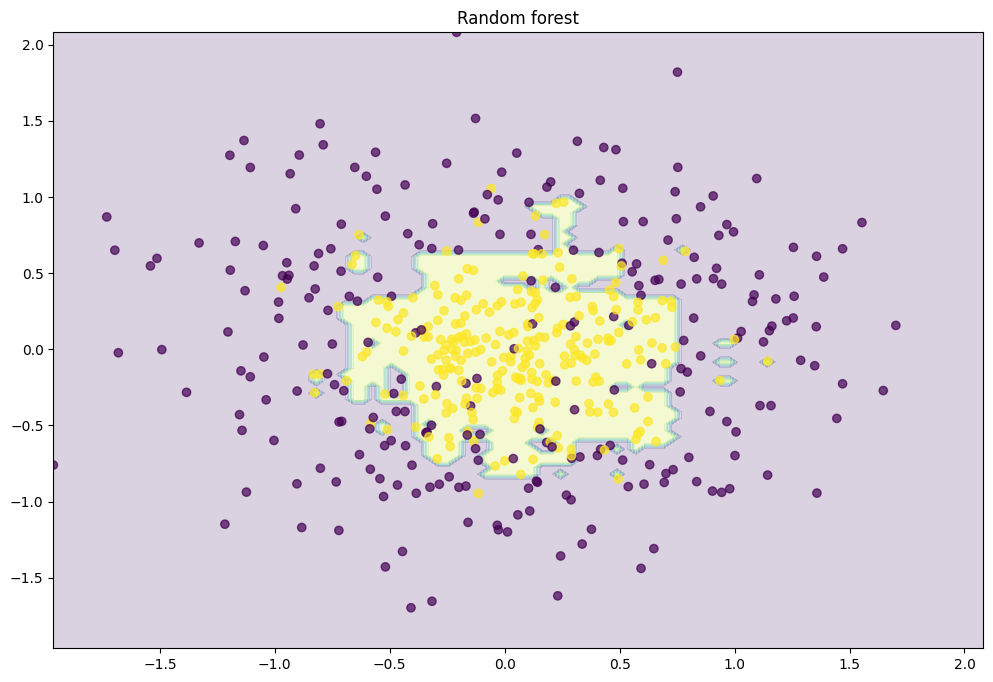

In [30]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
x_range = np.linspace(X.min(), X.max(), 100)
xx1, xx2 = np.meshgrid(x_range, x_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()